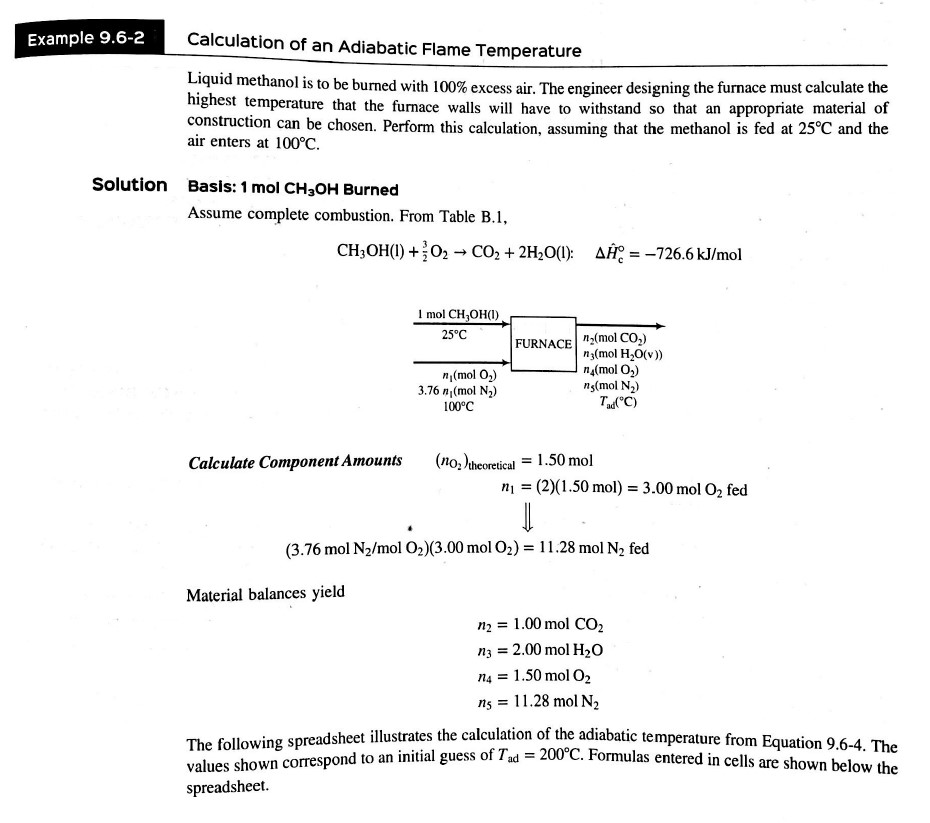

In [1]:
import math
import numpy as np
from scipy.optimize import fsolve

In [2]:
def NLEfun(T):
    O2Excess=2*(3/2) #mol/s
    NewN2=0.79/0.21*O2Excess #mol/s
    F1o=1#mol/s methanol
    F2o=O2Excess#mol/s O2
    F3o=NewN2#mol/s N2
    F4o=0#mol/s H2O
    F5o=0#mol/s CO2
    F1=F1o-1 #mol/s
    F2=F2o-3/2#mol/s
    F3=F3o-0 #mol/s
    F4=F4o+2#mol/s
    F5=F5o+1 #mol/s
    
    H1formLq=-3.386e2#kJ/mol
    H1formVap=-2.012e2#kJ/mol
    H2formVap=0
    H3formVap=0
    H4formVap=-2.4182e2#kJ/mol
    H5formVap=-3.9351e2#kJ/mol
    
    To=25+273.15
    
    Cpv1=(39252,87900,1916.5,53654,896.7)#Change to methanol
    Cpv2=(29103,10040,2526.5,9356,1153.8)
    Cpv3=(29105,8614.9,1701.6,103.47,909.79)
    Cpv4=(33363,26790,2610.5,8896,1169)
    Cpv5=(29370,34540,1428,26400,588)
    Cp2=1/1e6*(Cpv2[0]*(T-To)+Cpv2[1]*Cpv2[2]*(1/np.tanh(Cpv2[2]/T)
                            -1/np.tanh(Cpv2[2]/To))-Cpv2[3]*Cpv2[4]*(np.tanh(Cpv2[4]/T)-np.tanh(Cpv2[4]/To)))

    Cp3=1/1e6*(Cpv3[0]*(T-To)+Cpv3[1]*Cpv3[2]*(1/np.tanh(Cpv3[2]/T)
                            -1/np.tanh(Cpv3[2]/To))-Cpv3[3]*Cpv3[4]*(np.tanh(Cpv3[4]/T)-np.tanh(Cpv3[4]/To)))#kJ/mol
 
    Cp4=1/1e6*(Cpv4[0]*(T-To)+Cpv4[1]*Cpv4[2]*(1/np.tanh(Cpv4[2]/T)
                                -1/np.tanh(Cpv4[2]/To))-Cpv4[3]*Cpv4[4]*(np.tanh(Cpv4[4]/T)-np.tanh(Cpv4[4]/To)))#kJ/mol
 
    Cp5=1/1e6*(Cpv5[0]*(T-To)+Cpv5[1]*Cpv5[2]*(1/np.tanh(Cpv5[2]/T)
                                -1/np.tanh(Cpv5[2]/To))-Cpv5[3]*Cpv5[4]*(np.tanh(Cpv5[4]/T)-np.tanh(Cpv5[4]/To)))#kJ/mol
     
    H1Liq=H1formLq#kJ/mol
    H2Vap=H2formVap+Cp2#kJ/mol
    H3Vap=H3formVap+Cp3#kJ/mol
    H4Vap=H4formVap+Cp4#kJ/mol
    H5Vap=H5formVap+Cp5#kJ/mol
    Hdotin=H1Liq*F1o
    Hdotout=H2Vap*F2+H3Vap*F3+H5Vap*F5+H4Vap*F4
    fT= Hdotin-Hdotout
    return fT

In [4]:
Tguess=200
sol=fsolve(NLEfun,Tguess)
Tad=sol-273.15
print(sol,Tad)#Notice these are both array's of one element (e.g. notice the [] square brackets!)

print('Tad = {:7.2f}K Tad = {:7.2f}°C '.format(sol[0],Tad[0]))#The format command requires that the array element be identified.

[1308.56827193] [1035.41827193]
Tad = 1308.57K Tad = 1035.42°C 
